In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import VanillaRNN
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = VanillaRNN(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

VanillaRNN(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rnn): RNN(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 31.62
Training loss 1.8861
Validation accuracy 14.00
Validation loss 2.2953
============================== EPOCH 2 =================================
Training accuracy 43.19
Training loss 1.5759
Validation accuracy 24.25
Validation loss 2.0729
============================== EPOCH 3 =================================
Training accuracy 48.37
Training loss 1.4436
Validation accuracy 30.75
Validation loss 1.8261
============================== EPOCH 4 =================================
Training accuracy 51.56
Training loss 1.3664
Validation accuracy 28.00
Validation loss 1.9269
============================== EPOCH 5 =================================
Training accuracy 54.81
Training loss 1.2942
Validation accuracy 34.50
Validation loss 1.7145
============================== EPOCH 6 =================================
Training accuracy 56.12
Training loss 1.2332
Validation accuracy 24.50
Validation loss 2.135

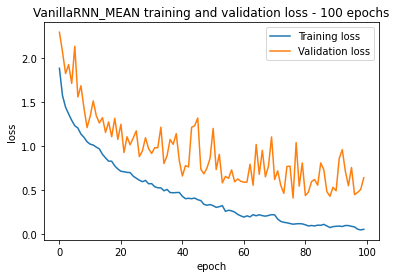

In [8]:
trainer.plot_loss("VanillaRNN_MEAN training and validation loss - 100 epochs")

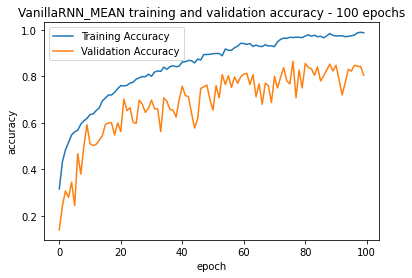

In [9]:
trainer.plot_accuracies("VanillaRNN_MEAN training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([6, 2, 0, 5, 4, 5, 0, 1, 2, 3, 8, 0, 3, 2, 4, 2, 4, 1, 4, 8, 2, 5, 2, 4,
         2, 8, 8, 8, 3, 3, 7, 3, 3, 2, 8, 4, 7, 2, 2, 7, 1, 3, 5, 2, 8, 1, 2, 7,
         8, 0, 0, 9, 2, 6, 0, 1, 1, 3, 7, 3, 8, 4, 3, 1, 1, 4, 2, 4, 5, 8, 3, 0,
         2, 5, 4, 6, 2, 3, 5, 2, 2, 8, 7, 2, 0, 7, 8, 6, 0, 0, 4, 3, 8, 7, 6, 7,
         4, 7, 7, 2, 2, 3, 3, 3, 0, 4, 0, 4, 5, 2, 7, 2, 4, 6, 0, 3, 0, 5, 4, 6,
         3, 2, 4, 4, 6, 3, 3, 2, 1, 3, 6, 0, 3, 4, 4, 8, 8, 9, 5, 1, 3, 6, 4, 8,
         6, 0, 6, 3, 2, 5, 7, 4, 0, 2, 4, 3, 0, 6, 0, 0, 4, 0, 4, 0, 2, 9, 0, 0,
         1, 0, 8, 1, 9, 3, 4, 2, 4, 7, 2, 7, 2, 6, 4, 2, 2, 4, 0, 4, 3, 6, 6, 1,
         4, 4, 7, 8, 4, 3, 2, 2, 5, 0, 0, 6, 2, 2, 0, 7, 4, 5, 7, 3, 4, 2, 5, 1,
         0, 3, 6, 4, 2, 8, 8, 3, 4, 6, 1, 5, 1, 3, 3, 4, 7, 0, 3, 7, 8, 6, 3, 7,
         4, 4, 2, 8, 8, 2, 0, 9, 6, 7, 8, 2, 3, 2, 7, 6, 2, 3, 2, 0, 0, 8, 3, 7,
         7, 0, 7, 5, 3, 1, 4, 1, 4, 3, 7, 4, 4, 5, 3, 7, 2, 2, 5, 9, 3, 3, 5, 4,
         6, 0, 2, 6, 5, 4, 0

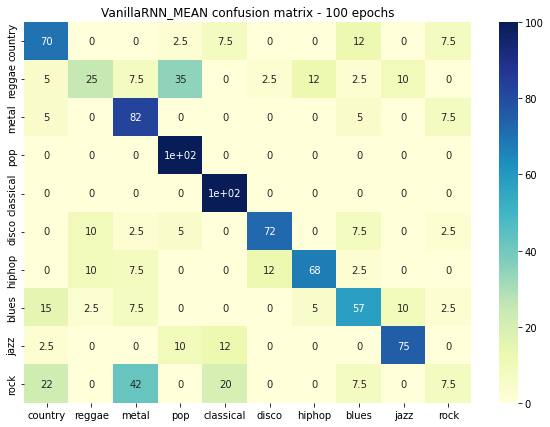

In [11]:
trainer.plot_confusion_matrix(test_dataloader, 'VanillaRNN_MEAN confusion matrix - 100 epochs')

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.58      0.70      0.64        40
      reggae       0.53      0.25      0.34        40
       metal       0.55      0.82      0.66        40
         pop       0.66      1.00      0.79        40
   classical       0.71      1.00      0.83        40
       disco       0.83      0.72      0.77        40
      hiphop       0.79      0.68      0.73        40
       blues       0.61      0.57      0.59        40
        jazz       0.79      0.75      0.77        40
        rock       0.27      0.07      0.12        40

    accuracy                           0.66       400
   macro avg       0.63      0.66      0.62       400
weighted avg       0.63      0.66      0.62       400



In [13]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = VanillaRNN(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

VanillaRNN(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rnn): RNN(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=85)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 32.69
Training loss 1.8540
Validation accuracy 14.25
Validation loss 2.2982
============================== EPOCH 2 =================================
Training accuracy 43.66
Training loss 1.5705
Validation accuracy 28.50
Validation loss 2.0612
============================== EPOCH 3 =================================
Training accuracy 46.56
Training loss 1.4701
Validation accuracy 24.50
Validation loss 2.0557
============================== EPOCH 4 =================================
Training accuracy 51.19
Training loss 1.3732
Validation accuracy 35.75
Validation loss 1.7742
============================== EPOCH 5 =================================
Training accuracy 53.72
Training loss 1.2857
Validation accuracy 25.25
Validation loss 2.0222
============================== EPOCH 6 =================================
Training accuracy 56.22
Training loss 1.2351
Validation accuracy 43.25
Validation loss 1.620

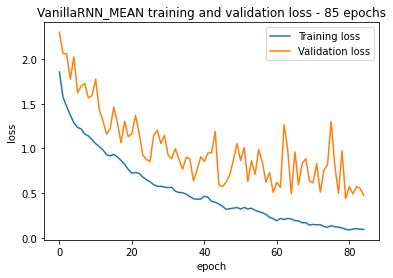

In [15]:
trainer_2.plot_loss("VanillaRNN_MEAN training and validation loss - 85 epochs")

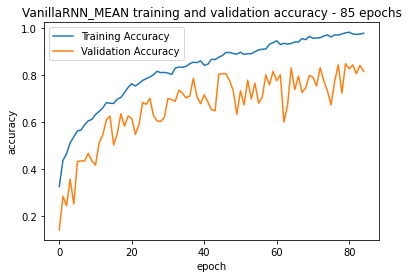

In [16]:
trainer_2.plot_accuracies("VanillaRNN_MEAN training and validation accuracy - 85 epochs")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([1, 0, 3, 0, 2, 5, 4, 3, 5, 4, 2, 6, 0, 6, 8, 0, 0, 5, 3, 5, 8, 5, 3, 8,
         5, 7, 6, 4, 9, 0, 1, 4, 2, 1, 9, 4, 4, 4, 0, 6, 2, 8, 9, 7, 4, 2, 2, 4,
         8, 4, 6, 5, 8, 2, 8, 6, 6, 6, 8, 5, 8, 8, 6, 2, 3, 3, 6, 6, 2, 4, 3, 6,
         9, 5, 5, 5, 6, 8, 1, 6, 0, 5, 4, 8, 1, 2, 9, 5, 2, 0, 2, 2, 0, 9, 0, 8,
         2, 9, 5, 6, 2, 5, 5, 4, 1, 7, 8, 8, 2, 9, 6, 0, 0, 2, 8, 3, 0, 3, 2, 9,
         6, 4, 5, 7, 9, 2, 1, 9, 5, 2, 3, 8, 0, 3, 9, 8, 6, 2, 1, 5, 3, 3, 3, 4,
         6, 0, 3, 6, 7, 6, 2, 5, 4, 9, 3, 5, 9, 0, 2, 7, 8, 2, 0, 3, 4, 3, 6, 4,
         3, 8, 0, 4, 0, 0, 2, 9, 6, 5, 0, 5, 6, 2, 2, 1, 1, 6, 3, 8, 2, 9, 6, 9,
         2, 9, 5, 8, 7, 3, 2, 7, 1, 8, 6, 0, 6, 2, 6, 7, 4, 7, 2, 0, 3, 0, 3, 2,
         9, 2, 2, 4, 7, 4, 4, 2, 9, 3, 2, 0, 2, 1, 3, 8, 9, 7, 8, 3, 2, 9, 8, 0,
         9, 6, 0, 3, 8, 5, 2, 1, 2, 1, 3, 3, 8, 5, 9, 2, 3, 9, 6, 2, 5, 8, 3, 0,
         9, 0, 7, 8, 7, 7, 5, 1, 2, 0, 7, 6, 2, 6, 6, 5, 5, 4, 0, 4, 9, 3, 9, 8,
         1, 0, 2, 6, 2, 8, 4

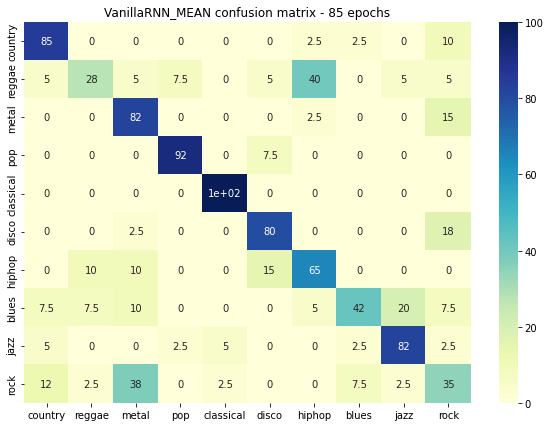

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader, 'VanillaRNN_MEAN confusion matrix - 85 epochs')

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.74      0.85      0.79        40
      reggae       0.58      0.28      0.37        40
       metal       0.56      0.82      0.67        40
         pop       0.90      0.93      0.91        40
   classical       0.93      1.00      0.96        40
       disco       0.74      0.80      0.77        40
      hiphop       0.57      0.65      0.60        40
       blues       0.77      0.42      0.55        40
        jazz       0.75      0.82      0.79        40
        rock       0.38      0.35      0.36        40

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.68       400
weighted avg       0.69      0.69      0.68       400

